# HOTEL REVIEWS NLP
## Group E

In [1]:
import pandas as pd

serie = pd.read_csv('Hotel reviews.csv')
df = pd.DataFrame(serie)

In [2]:
# Keeping only the hotels for our business purpose
df = df[df['Establishment Type'] == 'Hotel']
del df['Establishment Type']
df.head()

,Review Date,Star Rating,Overview,Review,Traveler Type,Score Breakdown,Location,Reviewer Rank,Name,Price Range,Hotel ID
0,28-Feb-11,5,Very nice atmosphere,We were together with some friends at the Anew...,traveled with family,Value: 5 of 5 stars; Location: 5 of 5 stars; S...,"Skofja Loka, Slovenia",NaN,Villa Ottone,$$,25.0
1,21-Feb-10,4,"Very nice food, great atmosphere, feels like...",Martin and his staff are truely great! They ma...,traveled with family,Value: 5 of 5 stars; Location: 3 of 5 stars; S...,Brussels,Contributor,Villa Ottone,$$,25.0
2,4 days ago NEW,5,Best Hotel on the Planet,We have stayed at the Excelsior on numerous oc...,traveled with family,Value: 5 of 5 stars; Sleep Quality: 5 of 5 sta...,"Singapore, Singapore",Contributor,San Vigilio,$$$$,49.0
3,17-Sep-14,5,Fantastic,The great reviews are well deserved. Stayed he...,traveled as a couple,Location: 5 of 5 stars; Rooms: 5 of 5 stars; S...,"Burlington, Canada",Senior Contributor,San Vigilio,$$$$,49.0
4,27-Jul-14,5,It is all true!,Not sure we can add anything to the accurate r...,traveled as a couple,Rooms: 5 of 5 stars; Cleanliness: 5 of 5 stars...,"Manchester, United Kingdom",Senior Reviewer,San Vigilio,$$$$,49.0


#### Date Cleaning

In [3]:
df = df[~df['Review Date'].str.contains("ago")]
df = df[~df['Review Date'].str.contains("NEW")]
df = df.reset_index(drop = True)
df['Review Date'] = pd.to_datetime(df['Review Date'])

In [4]:
#Checking types of columns
df.dtypes

Review Date        datetime64[ns]
Star Rating                 int64
Overview                   object
Review                     object
Traveler Type              object
Score Breakdown            object
Location                   object
Reviewer Rank              object
Name                       object
Price Range                object
Hotel ID                  float64
dtype: object

#### Location Cleaning

In [5]:
# renaming Location to CityofReviewer since we have a rating variable called Location
df = df.rename(columns={'Location': 'CityofReviewer'})

In [6]:
#Assigning a NULL to the empty cell, without doing it it is difficult to work on this column of lists
import warnings
warnings.filterwarnings('ignore')

df.CityofReviewer[df.CityofReviewer.isnull() == True] = 'NULL' 
df.CityofReviewer = df.CityofReviewer.str.split(", ")

In [7]:
# Creating a column just with the city and not the country because we have a lot of missing values for the country so is relevant to save only the city
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(df)):
        df.CityofReviewer[i] = df.CityofReviewer[i][0]
        

#### Reviewer Rank Cleaning

In [8]:
#Normalizing Review Rank but replacing NAs with Contributor 
df['Reviewer Rank'].fillna('Contributor', inplace=True)
df['Reviewer Rank'] = df['Reviewer Rank'].map({'Contributor': 1,'Reviewer': 2,\
                                               'Senior Contributor': 3,'Senior Reviewer': 4, 'Top Contributor': 5}).astype(int)

#### Expanding the Score Breakdown into 6 different columns known as Rating Variables: 
* `Value` 
* `Location` 
* `Sleep Quality`
* `Rooms` 
* `Cleanliness` 
* `Service` 

In [9]:
## creating a function to use in the below for loop
def sorter(text):
    text = text.strip()
    if text == "Value":
        return 0
    elif text == "Location":
        return 1
    elif text == "Sleep Quality":
        return 2
    elif text == "Rooms":
        return 3
    elif text == "Cleanliness":
        return 4
    elif text == "Service":
        return 5
    else:
        return 6
    

In [10]:
#Dropping NAs for the Score Breakdown column in order to continue with the filtering
df = df[df['Score Breakdown'].notna()].reset_index(drop = True)

#Creating an array for each value using the function mentioned above
import numpy as np
ma = np.zeros(shape = (len(df['Score Breakdown']), 7))

for i in range(0,len(df['Score Breakdown'])):
    
    ar = df['Score Breakdown'][i].split(";")
    ln = np.zeros(7)
    for j in range(0,len(ar)):
        k = ar[j][0:ar[j].index(':')]
        value = ar[j][(ar[j].index(':')+1):(ar[j].index('of'))].strip()
        ln[sorter(k)] = value
    ma[i] = ln
            

In [11]:
# converting the arrays created into columns by using the transpose function and deleting the Score Breakdown
df['Value'] = pd.Series(np.transpose(ma)[0]).astype(int)
df['Location'] = pd.Series(np.transpose(ma)[1]).astype(int)
df['Sleep Quality'] = pd.Series(np.transpose(ma)[2]).astype(int)
df['Rooms'] = pd.Series(np.transpose(ma)[3]).astype(int)
df['Cleanliness'] = pd.Series(np.transpose(ma)[4]).astype(int)
df['Service'] = pd.Series(np.transpose(ma)[5]).astype(int)
del df['Score Breakdown']

In [12]:
df

,Review Date,Star Rating,Overview,Review,Traveler Type,CityofReviewer,Reviewer Rank,Name,Price Range,Hotel ID,Value,Location,Sleep Quality,Rooms,Cleanliness,Service
0,2011-02-28,5,Very nice atmosphere,We were together with some friends at the Anew...,traveled with family,Skofja Loka,1,Villa Ottone,$$,25.0,5,5,4,5,5,5
1,2010-02-21,4,"Very nice food, great atmosphere, feels like...",Martin and his staff are truely great! They ma...,traveled with family,Brussels,1,Villa Ottone,$$,25.0,5,3,5,4,5,5
2,2014-09-17,5,Fantastic,The great reviews are well deserved. Stayed he...,traveled as a couple,Burlington,3,San Vigilio,$$$$,49.0,0,5,0,5,0,5
3,2014-07-27,5,It is all true!,Not sure we can add anything to the accurate r...,traveled as a couple,Manchester,4,San Vigilio,$$$$,49.0,0,0,0,5,5,5
4,2014-07-23,5,Beyond our expectations,Everything was a high level surprise: from the...,traveled with family,Milan,1,San Vigilio,$$$$,49.0,0,0,5,5,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4054,2005-11-15,5,A Perfect Place to Stay in a Quaint Town,This hotel is above & beyond. The room was ver...,NaN,Santa Cruz,4,Bolzano,$$,33.0,5,0,0,5,5,5
4055,2005-07-09,4,Super Hotel,My wife and I spent two nights here in June. T...,NaN,San Diego,1,Bolzano,$$,33.0,4,0,0,4,4,5
4056,2005-05-31,5,How cool is this place!,"I am at the Hotel Greif now, writing this revi...",NaN,Winter Haven,2,Bolzano,$$,33.0,5,0,0,5,5,5
4057,2005-02-03,5,Wow and wow,I have stayed at the Greif many times with my ...,traveled on business,UK,5,Bolzano,$$,33.0,4,0,0,5,5,5


In [13]:
#Checking for NAs
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4059 entries, 0 to 4058
Data columns (total 16 columns):
Review Date       4059 non-null datetime64[ns]
Star Rating       4059 non-null int64
Overview          4059 non-null object
Review            4059 non-null object
Traveler Type     3771 non-null object
CityofReviewer    4059 non-null object
Reviewer Rank     4059 non-null int64
Name              4059 non-null object
Price Range       3761 non-null object
Hotel ID          4019 non-null float64
Value             4059 non-null int64
Location          4059 non-null int64
Sleep Quality     4059 non-null int64
Rooms             4059 non-null int64
Cleanliness       4059 non-null int64
Service           4059 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(8), object(6)
memory usage: 507.5+ KB


#### Traveler Type Cleaning

In [14]:
u = df['Traveler Type'].str.partition()
df['Traveler Type'] = pd.DataFrame({ 'Traveler Type': u[2].str.split().str[-1]})
df['Traveler Type'].unique()

array(['family', 'couple', 'friends', 'solo', 'business', nan],
      dtype=object)

In [15]:
#Normalizing the Traveler Type
df['Traveler Type'] = df['Traveler Type'].map({'solo': 1,'couple': 2,\
                                               'friends': 3,'family': 4, 'business': 5})

In [16]:
# Filling NAs randomly of Traveller Type since we do not want to remove more rows
fill_list = [1,2,3,4,5]
df['Traveler Type'] = df['Traveler Type'].fillna(pd.Series(np.random.choice(fill_list, size=len(df.index))))
df['Traveler Type'] = df['Traveler Type'].astype(int)

#### Price Range Cleaning

In [17]:
#Normalizing Price Range
df['Price Range'] = df['Price Range'].map({'$': 1,'$$': 2,\
                                               '$$$': 3,'$$$$': 4})
#Filling missing Values using the mean
df['Price Range']=df['Price Range'].fillna(df['Price Range'].mean())


#### Hotel ID Cleaning

In [18]:
#since we have 40 missing values in this column and the values are unique, we will drop the NAs
df = df[df['Hotel ID'].notna()].reset_index(drop = True)
#converting Hotel ID to int
df['Hotel ID'] = df['Hotel ID'].astype(int)

## EDA

In [19]:
#Grouping by Name(City) to get the top Hotels
HotelCountPerCity = df.groupby(['Name']).agg({'Hotel ID':['count']})
HotelCountPerCity.columns = ['Number of Hotels']
print("Top 5 cities with most Hotels:")
HotelCountPerCity.sort_values(by="Number of Hotels", ascending=False).head()

Top 5 cities with most Hotels:


,Number of Hotels
Name,
Bolzano,803
Castelrotto,393
Ortisei,375
Corvara in Badia,297
Sesto,161


#### Creating a new dataframe called MeanAndCount to analyze the different types of ratings. It contains:
* `Count` 
* `Value_mean` 
* `Location_mean` 
* `Sleep Quality_mean`
* `Rooms_mean` 
* `Cleanliness_mean` 
* `Service_mean` 

In [20]:
#Grouping by Hotel ID 
MeanAndCount = df.groupby(['Hotel ID']).agg({'Hotel ID':['count'],'Value': ['mean'],'Location': ['mean'], 'Sleep Quality': ['mean'], 'Rooms': ['mean'],\
                              'Cleanliness': ['mean'],'Service': ['mean']})
MeanAndCount.columns = ['Count','Value_mean','Location_mean', 'SleepQuality_mean', 'Rooms_mean','Cleanliness_mean','Service_mean']                
MeanAndCount = MeanAndCount.reset_index()



In [21]:
# getting the Hotels with most reviews
print("Top 5 Hotels with most counts:")
top = MeanAndCount.sort_values(by="Count", ascending=False).head()
top

Top 5 Hotels with most counts:


,Hotel ID,Count,Value_mean,Location_mean,SleepQuality_mean,Rooms_mean,Cleanliness_mean,Service_mean
47,50,240,4.112500,4.091667,3.712500,3.987500,4.508333,4.708333
15,18,185,4.432432,4.372973,3.210811,4.264865,4.675676,4.800000
72,100,184,4.021739,4.478261,3.494565,4.347826,4.445652,4.478261
9,12,183,4.502732,4.180328,3.710383,4.021858,4.491803,4.765027
27,30,167,4.011976,4.011976,3.479042,3.952096,4.347305,4.646707


In [22]:

top.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, title = "Top 5 hotels with most counts")

In [23]:
# getting the Hotels with highest ratings keeping number of reviews > 10 
print("Top 5 Hotels with highest Value ratings:")
MeanAndCount = MeanAndCount[MeanAndCount['Count'] >10]
top_value = MeanAndCount.sort_values(by="Value_mean", ascending=False).head()
top_value

Top 5 Hotels with highest Value ratings:


,Hotel ID,Count,Value_mean,Location_mean,SleepQuality_mean,Rooms_mean,Cleanliness_mean,Service_mean
14,17,24,4.666667,3.958333,3.000000,3.500000,4.291667,4.791667
9,12,183,4.502732,4.180328,3.710383,4.021858,4.491803,4.765027
18,21,50,4.480000,3.940000,3.140000,3.880000,4.440000,4.660000
2,4,17,4.470588,4.235294,3.000000,3.411765,4.235294,4.588235
49,52,15,4.466667,3.533333,3.066667,3.466667,4.733333,4.333333


#### Plotting top 5 hotels with highest mean of the six different categories

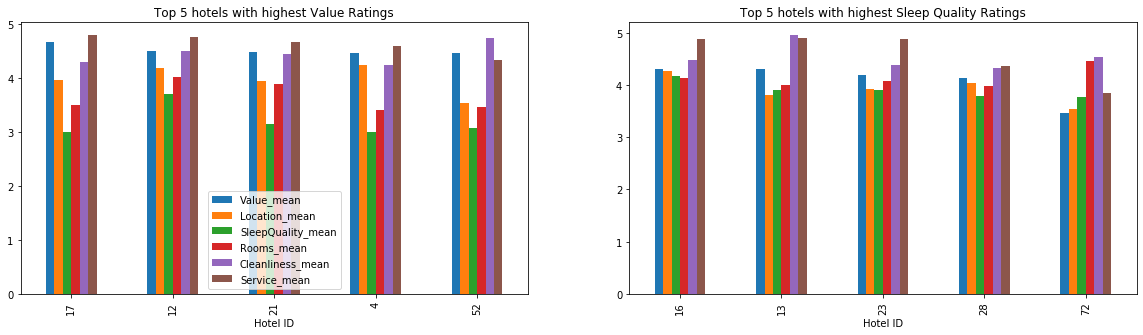

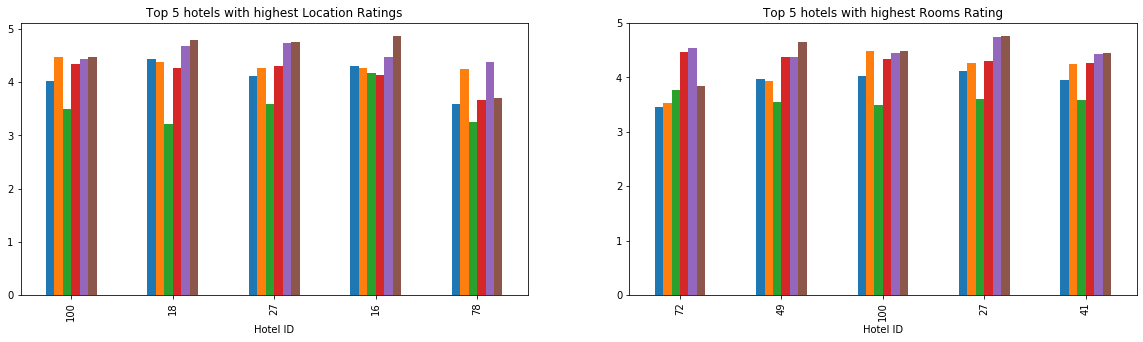

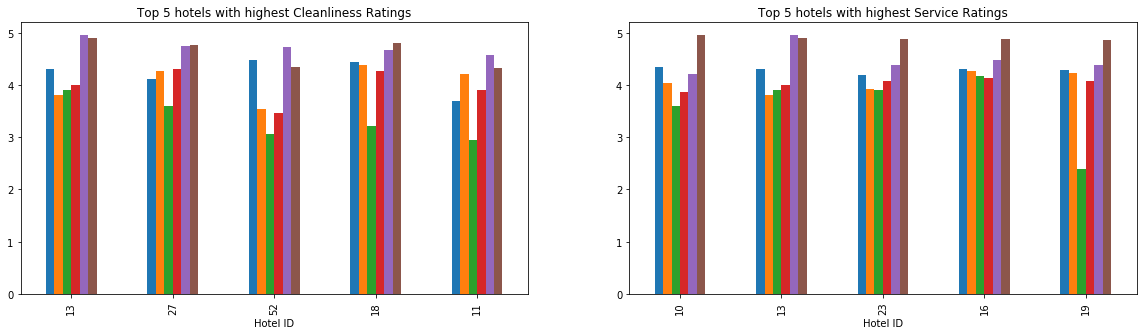

In [24]:
# Increasing size of output window
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 65em; }</style>"))

# keeping number of reviews > 10
MeanAndCount = MeanAndCount[MeanAndCount['Count'] >10]

top_value = MeanAndCount.sort_values(by="Value_mean", ascending=False).head()
top_sleepquality = MeanAndCount.sort_values(by="SleepQuality_mean", ascending=False).head()
top_location = MeanAndCount.sort_values(by="Location_mean", ascending=False).head()
top_rooms = MeanAndCount.sort_values(by="Rooms_mean", ascending=False).head()
top_cleanliness = MeanAndCount.sort_values(by="Cleanliness_mean", ascending=False).head()
top_service = MeanAndCount.sort_values(by="Service_mean", ascending=False).head()


from matplotlib import pyplot as plt

fig, (ax1,ax2) = plt.subplots(1,2, figsize=(20,5))

top_value.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar", ax=ax1, title = "Top 5 hotels with highest Value Ratings")

top_sleepquality.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax2, title = "Top 5 hotels with highest Sleep Quality Ratings")

fig, (ax3,ax4) = plt.subplots(1,2, figsize=(20,5))

top_location.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax3, title = "Top 5 hotels with highest Location Ratings")

top_rooms.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax4, title = "Top 5 hotels with highest Rooms Rating")

fig, (ax5,ax6) = plt.subplots(1,2, figsize=(20,5))

top_cleanliness.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax5, title = "Top 5 hotels with highest Cleanliness Ratings")
               
top_service.plot(x="Hotel ID", y=["Value_mean", "Location_mean", "SleepQuality_mean", "Rooms_mean","Cleanliness_mean",\
                          "Service_mean"], kind="bar",legend=None, ax=ax6, title = "Top 5 hotels with highest Service Ratings")


Looking at the graphs above and the Minimum and Maximum ratings below, we notice that Sleep Quality has always low ratings reaching a minimum of 1.5833 (not shown in the graphs). Hotel ID 16 has the highest Sleep Quality with a 4.17 compared to Hotel ID 17 with a 4.66 in Value ratings. Moreover, we can see that Cleanliness and Service have the two highest ratings in most graphs which that we will not have a lot of negative ratings that mention these two categories, they have a maximum rating of around 4.95 for both. However, this means that after doing the analysis, we should have a lot of negative comments that mention Sleep Quality, Rooms, Value.

In [25]:
# Get a series containing maximum value of each rating column
MeanAndCount1 = MeanAndCount
del MeanAndCount1['Hotel ID']
del MeanAndCount1['Count']
maxRatings = MeanAndCount1.max()
 
print('Maximum average of each rating category : ')
print(maxRatings)

Maximum average of each rating category : 
Value_mean           4.666667
Location_mean        4.478261
SleepQuality_mean    4.173913
Rooms_mean           4.461538
Cleanliness_mean     4.950000
Service_mean         4.944954
dtype: float64


In [26]:
# Get a series containing minimum value of each rating column

minRatings = MeanAndCount1.min()
 
print('Minimum average of each rating category: ')
print(minRatings)

Minimum average of each rating category: 
Value_mean           3.301887
Location_mean        2.400000
SleepQuality_mean    1.583333
Rooms_mean           2.933333
Cleanliness_mean     3.650000
Service_mean         3.700000
dtype: float64


#### Plotting a time series of Year vs. Count

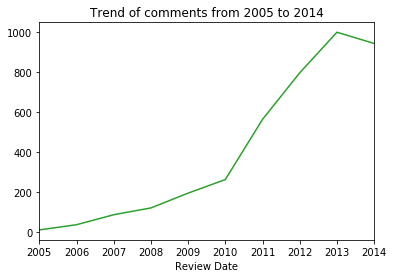

In [27]:
df['Review Date'].groupby([df['Review Date'].dt.year]).agg('count').plot(color = 'C2', kind="line", title = "Trend of comments from 2005 to 2014")


The trend shows an upward trend from 11 comments in 2005 reaching 1000 comments in 2013, an increase of  around 9000% in 8 years. This implies that nowadays we have millions of comments happening each day which means that an analyst working in the hotel management cannot track the comments except if it is automated in splitting comments into good or bad and giving advice to improve the work. This work is done using NLP and ML as shown further in this analysis

#### How are ratings Distributed

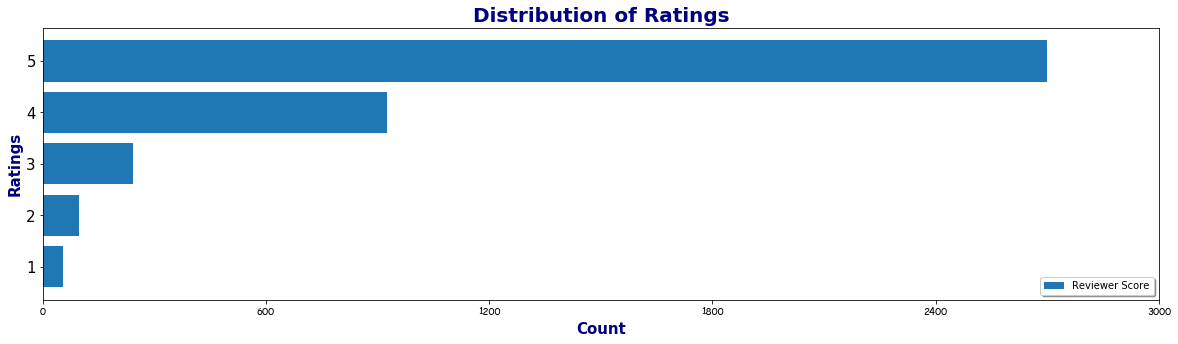

In [28]:
from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height:35em; }</style>"))

# Plot ratings frequency
plt.figure(figsize = [20,5])   # [width, height]

x = list( df['Star Rating'].value_counts().index )
y = list( df['Star Rating'].value_counts() )
plt.barh(x, y)

ticks_x = np.linspace(0, 3000, 6)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15 )

plt.title('Distribution of Ratings', fontsize=20, weight='bold', color='navy', loc='center')
plt.xlabel('Count', fontsize=15, weight='bold', color='navy')
plt.ylabel('Ratings', fontsize=15, weight='bold', color='navy')
plt.legend(['Reviewer Score'], shadow=True, loc=4)

### Creation of target variable
In order to define the target variable to train our NLP model we are going to use the overall rating

In [29]:
import warnings
warnings.filterwarnings('ignore')

df['Target'] = np.nan
for i in range(0,len(df)):
    if df['Star Rating'][i] > 3:
        df['Target'][i] = 0
    else:
        df['Target'][i] = 1
df['Target'] = df['Target'].astype(int)

### Plotting Target Variable

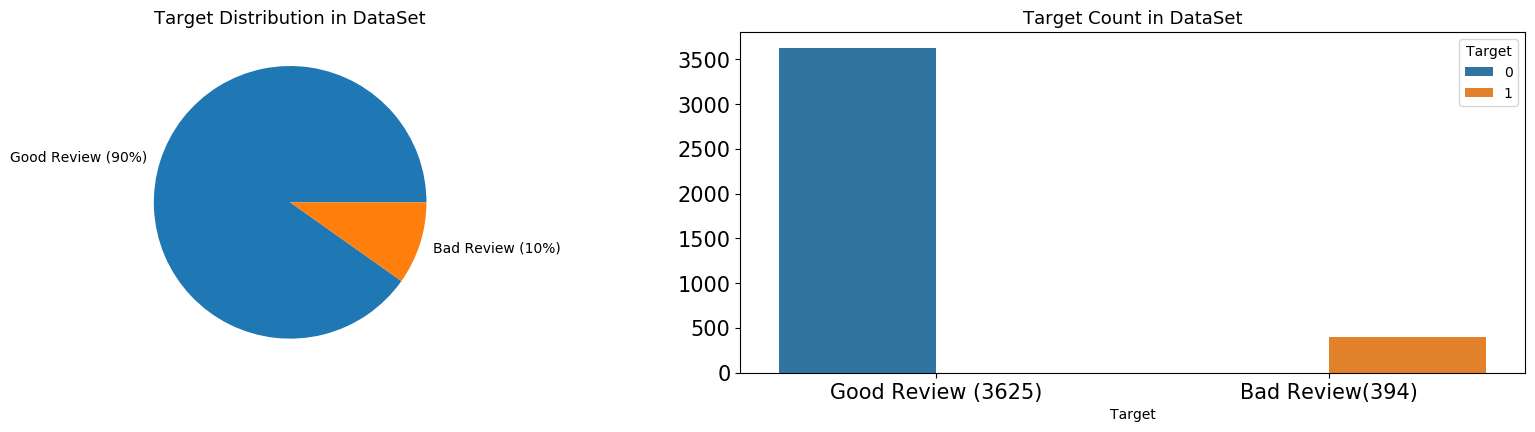

In [30]:
import seaborn as sns

fig, axes = plt.subplots(ncols=2, figsize=(17, 4), dpi=100)
plt.tight_layout()

df.groupby('Target').count()['Hotel ID'].plot(kind='pie', ax=axes[0], labels=['Good Review (90%)', 'Bad Review (10%)'])
sns.countplot(x=df['Target'], hue=df['Target'], ax=axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Good Review (3625)', 'Bad Review(394)'])
axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Target Distribution in DataSet', fontsize=13)
axes[1].set_title('Target Count in DataSet', fontsize=13)

plt.show()

The two graphs above show that we have an imbalance data set with a difference of 80% in size. We will fix this issue later on.

### Plotting the rating variables  against the target variable

<Figure size 2160x2160 with 0 Axes>

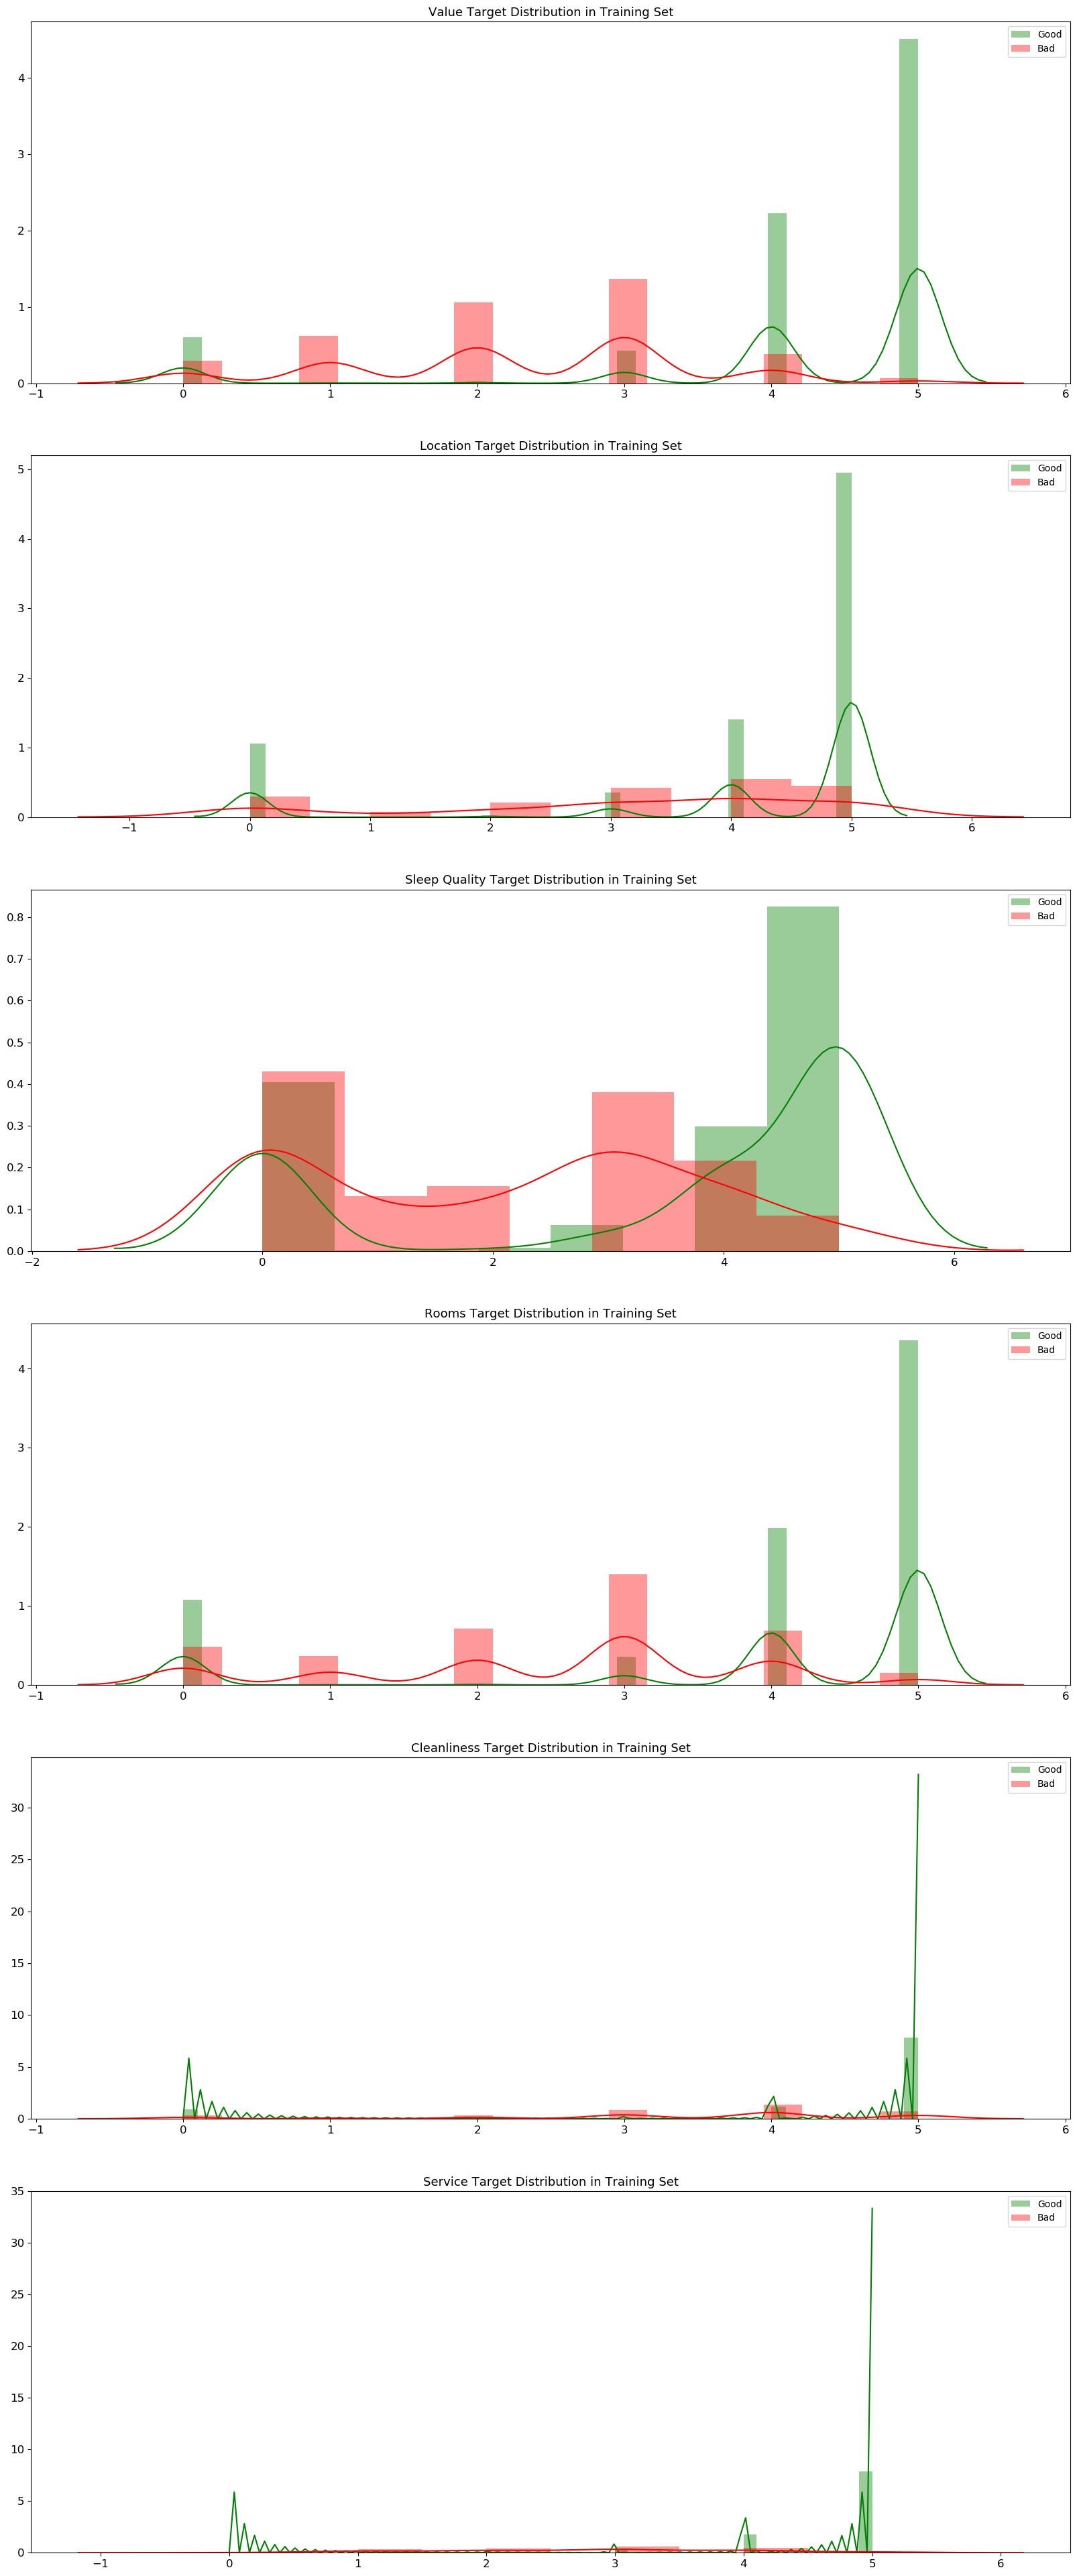

In [31]:

import warnings
warnings.filterwarnings('ignore')

METAFEATURES = ['Value', 'Location', 'Sleep Quality', 'Rooms', 'Cleanliness','Service']
BAD_TWEET = df['Target'] == 1
plt.figure(figsize = [30,30])
fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(20, 50), dpi=100)

for i, feature in enumerate(METAFEATURES):
    
    sns.distplot(df.loc[~BAD_TWEET][feature], label='Good', ax=axes[i], color='green')
    sns.distplot(df.loc[BAD_TWEET][feature], label='Bad', ax=axes[i], color='red')
    
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    axes[i].tick_params(axis='y', labelsize=12)
    axes[i].legend()
  
    
    axes[i].set_title(f'{feature} Target Distribution in Training Set', fontsize=13)



Comparing the graphs above, we can notice that most ratings equal to 3 or lower are bad. As explained previousyly that we will see more negative reviews in all rating variables except for Service and Cleanliness. This shows that we can classify the rating variables into 0s and 1s. 0 (Good Rating) for ratings greater than 3 and 1 (Bad Review) for ratings equal or lower than 3. 

#### Multi_Class of the Rating Variables

In [32]:
df

,Review Date,Star Rating,Overview,Review,Traveler Type,CityofReviewer,Reviewer Rank,Name,Price Range,Hotel ID,Value,Location,Sleep Quality,Rooms,Cleanliness,Service,Target
0,2011-02-28,5,Very nice atmosphere,We were together with some friends at the Anew...,4,Skofja Loka,1,Villa Ottone,2.0,25,5,5,4,5,5,5,0
1,2010-02-21,4,"Very nice food, great atmosphere, feels like...",Martin and his staff are truely great! They ma...,4,Brussels,1,Villa Ottone,2.0,25,5,3,5,4,5,5,0
2,2014-09-17,5,Fantastic,The great reviews are well deserved. Stayed he...,2,Burlington,3,San Vigilio,4.0,49,0,5,0,5,0,5,0
3,2014-07-27,5,It is all true!,Not sure we can add anything to the accurate r...,2,Manchester,4,San Vigilio,4.0,49,0,0,0,5,5,5,0
4,2014-07-23,5,Beyond our expectations,Everything was a high level surprise: from the...,4,Milan,1,San Vigilio,4.0,49,0,0,5,5,0,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4014,2005-11-15,5,A Perfect Place to Stay in a Quaint Town,This hotel is above & beyond. The room was ver...,3,Santa Cruz,4,Bolzano,2.0,33,5,0,0,5,5,5,0
4015,2005-07-09,4,Super Hotel,My wife and I spent two nights here in June. T...,4,San Diego,1,Bolzano,2.0,33,4,0,0,4,4,5,0
4016,2005-05-31,5,How cool is this place!,"I am at the Hotel Greif now, writing this revi...",5,Winter Haven,2,Bolzano,2.0,33,5,0,0,5,5,5,0
4017,2005-02-03,5,Wow and wow,I have stayed at the Greif many times with my ...,5,UK,5,Bolzano,2.0,33,4,0,0,5,5,5,0


In [ ]:
import warnings
warnings.filterwarnings('ignore')

for i in range(0,len(df)):
    if df['Value'][i] > 3:
        df['Value'][i] = 0
    else:
        df['Value'][i] = 1
        
    if df['Sleep Quality'][i] > 3:
        df['Sleep Quality'][i] = 0
    else:
        df['Sleep Quality'][i] = 1
        
    if df['Rooms'][i] > 3:
        df['Rooms'][i] = 0
    else:
        df['Rooms'][i] = 1
        
    if df['Cleanliness'][i] > 3:
        df['Cleanliness'][i] = 0
    else:
        df['Cleanliness'][i] = 1
        
    if df['Service'][i] > 3:
        df['Service'][i] = 0
    else:
        df['Service'][i] = 1
        
    if df['Location'][i] > 3:
        df['Location'][i] = 0
    else:
        df['Location'][i] = 1

#### Comparison of the two classes found in the Ratings Variables

In [ ]:
METAFEATURES = ['Value', 'Location', 'Sleep Quality', 'Rooms', 'Cleanliness','Service']


fig, axes = plt.subplots(ncols=1, nrows=len(METAFEATURES), figsize=(10, 10), dpi=100)
labels = list(METAFEATURES)
for i, feature in enumerate(METAFEATURES):
    
#     plt.pie(df.loc[~BAD_TWEET][feature], label='Good', ax=axes[i], color='green')
#     plt.pie(df.loc[BAD_TWEET][feature], label='Bad', ax=axes[i], color='red')
    
    df.groupby([feature]).count()['Target'].plot(kind='pie', ax=axes[i], labels= ['Good Review', 'Bad Review'],textprops={'fontsize': 7}, subplots=True, legend = False)
    axes[i].set_ylabel('')

  
    
    axes[i].set_title(f'Comparison of the two classes in {feature} variable', fontsize=10)

As mentioned previously, we notice Sleep-Quality has a lot of Bad reviews while Service and Cleanliness have a lot of positive reviews compared to the others.

The aim of this analysis is to differentiate between Good and Bad reviews and then checking what improvements can be done by scanning for "important" words. We will test this idea by using the review text and target variable to predict the above mentioned rating variables and see if we get a good accuracy. (e.g: if a review mentiones dirty, then cleanliness should be 1: a bad review.

#### Ratings Variable vs. Target

In [ ]:
import markdown as Markdown

sum_value = 0
sum_location = 0
sum_sleep_quality = 0
sum_rooms = 0
sum_cleanliness = 0
sum_service = 0

for i in range(0,len(df)):
    if df['Target'][i] == df['Value'][i]:
        sum_value = sum_value + 1
    else:
        sum_value
        
    if df['Target'][i] == df['Location'][i]:
        sum_location = sum_location + 1
    else:
        sum_location
        
    if df['Target'][i] == df['Sleep Quality'][i]:
        sum_sleep_quality = sum_sleep_quality + 1
    else:
        sum_sleep_quality
        
    if df['Target'][i] == df['Rooms'][i]:
        sum_rooms = sum_rooms + 1
    else:
        sum_rooms
        
    if df['Target'][i] == df['Cleanliness'][i]:
        sum_cleanliness = sum_cleanliness + 1
    else:
        sum_cleanliness
        
    if df['Target'][i] == df['Service'][i]:
        sum_service = sum_service + 1
    else:
        sum_service
        

        

print("Value and Target match:" + str(round((sum_value/len(df)*100),2)) + "% of the time") 
print("Location and Target match:" + str(round((sum_location/len(df)*100),2)) + "% of the time")   
print("Sleep Quality and Target match:" + str(round((sum_sleep_quality/len(df)*100),2)) + "% of the time")   
print("Rooms and Target match:" + str(round((sum_rooms/len(df)*100),2)) + "% of the time")   
print("Cleanliness and Target match:" + str(round((sum_cleanliness/len(df)*100),2)) + "% of the time") 
print("Service and Target match:" + str(round((sum_service/len(df)*100),2)) + "% of the time")   

Looking at the above analysis we notice that our previous analysis confirms these findings. We mentioned that sleep quality will have a lot of bad reviews, logically it will not have a high accuracy with the target since only 10% of reviews are bad. Sleep Quality is the least matched with target with a 71% accuracy while Service has a 93% accuracy with the target

#### NLP Cleaning

In [ ]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>")) # Increase cell width
display(HTML("<style>.rendered_html { font-size: 16px; }</style>")) # Increase font size

# Matplotlib conf
import matplotlib.pyplot as plt
from matplotlib import interactive
%matplotlib inline

# Seaborn conf
import seaborn as sns
sns.set_palette(sns.color_palette("seismic"))

# Needed Libraries
import sys
import pandas
import pandas as pd
import numpy as np
import operator
import string
import re

import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
from nltk.stem import *
from nltk.corpus import stopwords as stop_words
from nltk.tokenize import WhitespaceTokenizer



from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit


In [ ]:
df.head(1)

In [ ]:
def process_text(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))

In [ ]:
# Cleaning the Overview
df['clean_overview'] = df['Overview'].apply(lambda x: process_text(x))
df.head()

In [ ]:
# Cleaning the Review
df['clean_review'] = df['Review'].apply(lambda x: process_text(x))
df.head()

In [ ]:
categories = ['Value', 'Sleep Quality', 'Rooms', 'Location','Cleanliness', 'Service']
train, test = train_test_split(df, random_state=42, test_size=0.33, shuffle=True)
X_train = train.clean_review
X_test = test.clean_review
print(X_train.shape)
print(X_test.shape)

Naives Baes

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.multiclass import OneVsRestClassifier


# Define a pipeline combining a text feature extractor with multi lable classifier
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

In [ ]:
features=df.iloc[:,[3]]
features.reset_index(inplace=True)
features=features.iloc[:,1:]

In [ ]:
from textblob import TextBlob
polarity=[] # list which will contain the polarity of the comments
subjectivity=[] # list which will contain the subjectivity of the comments

for i in features['Review'].values:
    try:
        analysis =TextBlob(i)
        polarity.append(analysis.sentiment.polarity)
        subjectivity.append(analysis.sentiment.subjectivity)
        
    except:
        polarity.append(0)
        subjectivity.append(0)

In [ ]:
#Adding the Sentiment Polarity column to the data
df['polarity']=polarity
df['subjectivity']=subjectivity 

In [ ]:
df['label']=' '

for i in range(len(df)):
    if df['polarity'][i]>0:
        df.at[i,'label']=0
    elif df['polarity'][i]<0:
        df.at[i,'label']=1
    else:
        df.at[i,'label']=2

In [ ]:
len(df[df['label']== 1])

In [ ]:
def process_text(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
#     stemmer = PorterStemmer()
#     stemmed = [stemmer.stem(word) for word in not_stop_words]
   
    
    return( " ".join( lemmatized )) 

In [ ]:
# Cleaning the Overview
df['clean_overview'] = df['Overview'].apply(lambda x: process_text(x))
df.head()

In [ ]:
# Cleaning the Review
df['clean_review'] = df['Review'].apply(lambda x: process_text(x))
df.head()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf = TfidfVectorizer(max_features=50000)
tf_data = tf_idf.fit_transform(df["clean_review"])
t=tf_data.toarray()
labels = df['label'].values.astype('float64')

In [ ]:
# naiver bayes mutinomial 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(t, labels, test_size = 0.20, random_state = 0)

In [ ]:
#naive bayes bernoulii
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
classifier =BernoulliNB()
classifier.fit(features_train, labels_train)

In [ ]:
labels_pred = classifier.predict(features_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print (accuracy_score(labels_test, labels_pred)) #can be calcuated from cm as well

In [ ]:
#sampling of the data
neg_review=len(df[df['label']==1])
sample_data = df[df['label']==0].sample(neg_review, replace=True)
neg_data = df[df['label']==1]

In [ ]:
over_sample_df = pd.concat([sample_data,neg_data], axis=0)
over_sample_class_counts=pd.value_counts(over_sample_df['label'])

In [ ]:
over_sample_class_counts.plot(kind='bar')
plt.xlabel = 'label' 
plt.ylabel = 'Frequency'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer 
tf_idf = TfidfVectorizer(max_features=50000)
tf_data = tf_idf.fit_transform(list(over_sample_df['clean_review']))
t=tf_data.toarray()

obj_dict={}
obj_dict["Vectorizer"]=tf_idf

labels = over_sample_df['label'].values.astype('float64')

In [ ]:
# naiver bayes mutinomial 
from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(t, labels, test_size = 0.20, random_state = 0)

In [ ]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
classifier = BernoulliNB()
classifier.fit(features_train, labels_train)

obj_dict["BNB"]=classifier 
# Predicting the Test set results
labels_pred = classifier.predict(features_test)

In [ ]:
from sklearn.metrics import accuracy_score 
print (accuracy_score(labels_test, labels_pred)) #can be calcuated from cm as well

In [ ]:
df

In [ ]:
tokenized_reviews = pd.Series(df['clean_review']).apply(lambda x: x.split())

print(tokenized_reviews[1])

In [ ]:
import gensim
from gensim import corpora

dictionary = corpora.Dictionary(tokenized_reviews)

In [ ]:

'''
OPTIONAL STEP
Remove very rare and very common words:

- words appearing less than 15 times
- words appearing in more than 10% of all documents
'''
dictionary.filter_extremes(no_below=15, no_above=0.1, keep_n= 100000)

In [ ]:
doc_term_matrix = [dictionary.doc2bow(rev) for rev in tokenized_reviews]

In [ ]:
# Creating the object for LDA model using gensim library
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=6, random_state=100,
                chunksize=1000, passes=50)

In [ ]:
lda_model.print_topics()

In [ ]:
##### Locationss = df[df['Value'] == 1]
Locationss

In [ ]:
from textblob.classifiers import NaiveBayesClassifier as NBC
from textblob import TextBlob

training_corpus = [
                   ('dirty', 'Cleanliness'),
                   ("unclean", 'Cleanliness'),
                   ('polluted', 'Cleanliness'),
                   ('garbage', 'Cleanliness'),
                   ('expensive', 'Value'),
                   ('price', 'Value'),
                   ('cost', 'Value'),
                   ('rate', 'Value'),
                   ("What an awesome view", 'Class_A'),
                   ('I do not like this dish', 'Class_B')]
test_corpus = [
                ("I am not feeling well today.", 'Class_B'), 
                ("I feel brilliant!", 'Class_A'), 
                ('Gary is a friend of mine.', 'Class_A'), 
                ("I can't believe I'm doing this.", 'Class_B'), 
                ('The date was good.', 'Class_A'), ('I do not enjoy my job', 'Class_B')]

model = NBC(training_corpus) 
print(model.classify("Their codes are amazing."))
>>> "Class_A" 
print(model.classify("I don't like their computer."))
>>> "Class_B"
print(model.accuracy(test_corpus))
>>> 0.83 
```

In [ ]:
def process_text(raw_text):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_text) 
    words = letters_only.lower().split()
    
    stops = set(stopwords.words("english")) 
    not_stop_words = [w for w in words if not w in stops]
    
    wordnet_lemmatizer = WordNetLemmatizer()
    lemmatized = [wordnet_lemmatizer.lemmatize(word) for word in not_stop_words]
    
    stemmer = PorterStemmer()
    stemmed = [stemmer.stem(word) for word in lemmatized]
    
    return( " ".join( stemmed ))  

In [ ]:
# Cleaning the Overview
df['clean_overview'] = df['Overview'].apply(lambda x: process_text(x))
df.head()

In [ ]:
# Cleaning the Review
# Cleaning the Overview
df['clean_review'] = df['Review'].apply(lambda x: process_text(x))
df.head()